> # SUPPORT VECTOR MACHINE - 1 

## Import the libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'ads.csv')

In [3]:
data.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


## Exploratory Data Analysis

In [4]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
data.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.drop(['User ID'],axis=1,inplace=True)

## Store the value of features and target output in seperate DataFrames

In [7]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=0)

## Apply SVM and fit the model

In [9]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

## Predict the values

In [10]:
y_pred = svc.predict(x_test)

## Accuracy Score

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred)*100

80.0

In [12]:
svc.score(x_test,y_test)

0.8

## Apply SVM of different kernels and Find Accuracy Score

In [13]:
svc=SVC(C=100.0) 
linear_svc = SVC(kernel='linear') 
linear_svc = SVC(kernel='linear', C=100.0) 
poly_svc = SVC(kernel='poly', C=1.0) 
poly_svc = SVC(kernel='poly', C=100.0) 

svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)*100

81.0

### Try these as well

In [ ]:
linear_svc = SVC(kernel='linear') 
linear_svc.fit(x_train,y_train)

y_pred_test = linear_svc.predict(x_test)
accuracy_score(y_test,y_pred)*100

In [ ]:
linear_svc = SVC(kernel='linear', C=100.0) 
linear_svc.fit(x_train,y_train)

y_pred_test = linear_svc.predict(x_test)
accuracy_score(y_test,y_pred)*100

In [ ]:
poly_svc = SVC(kernel='poly', C=1.0) 
poly_svc.fit(x_train,y_train)

y_pred = poly_svc.predict(x_test)
accuracy_score(y_test,y_pred)*100

In [ ]:
poly_svc = SVC(kernel='poly', C=100.0) 
poly_svc.fit(x_train,y_train)

y_pred = poly_svc.predict(x_test)
accuracy_score(y_test,y_pred)*100

## ROC Curve 

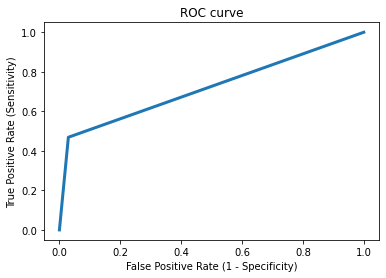

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, linewidth=3)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Cross Validation

In [15]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = KFold(n_splits=5)
skf = StratifiedKFold(n_splits=5)

In [16]:
for i,j in kf.split(x):
    x_train, x_test = x[i],x[j]
    y_train, y_test = y[i], y[j]
    clf = SVC()
    clf.fit(x_train,y_train)
    print(clf.score(x_test,y_test))

0.8125
0.975
0.8875
0.6375
0.55


In [17]:
for i,j in skf.split(x,y):
    x_train, x_test = x[i],x[j]
    y_train, y_test = y[i], y[j]
    clf = SVC()
    clf.fit(x_train,y_train)
    print(clf.score(x_test,y_test))

0.8125
0.8625
0.7375
0.8125
0.6375
